## Setup

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For mac users with Retina display
from matplotlib import pyplot as plt
import numpy as np
import pygtc

In [3]:
## Use the setup.py file to output directories. 
import sys
sys.path.append('/global/homes/z/zzhang13/BaryonPasting/CorrelatedStructures/multiDark/')

from setup import *
toolsdir = tools_dir()
repodir = repo_dir()
chainsdir = chains_dir()
datadir = data_dir()
plotdir = plots_dir()

sys.path.append(toolsdir)
sys.path.append(repodir)

In [4]:
import warnings
warnings.filterwarnings("ignore")

## Data Vector

In [5]:
from data_bins import r_cent_lin_norm, r_cent_log_norm
from data_bins import mass_bins, mass_bin_cent
from data_bins import a_bins

In [6]:
##Configuring the chains

## Extract the chains

In [7]:
radius_bins_dir = {'R200c_binned_Dsep_1Mpc':'R200c_binned/Dsep_1/', \
                   'R200c_binned_Dsep_R200c':'R200c_binned/Dsep_R200c/', \
                   'Rvir_binned_Dsep_1Mpc':'Rvir_binned/Dsep_1/', \
                   'Rvir_binned_Dsep_Rvir':'Rvir_binned/Dsep_Rvir/'
                   }

In [8]:
chains_dict = {}

In [9]:
redshift = 0.00
redshift_str = '{:.2f}'.format(redshift)
redshift_str = redshift_str.replace('.','p')
mass_min = 2e14; mass_max = 5e14

## Extract the full model chains in z=0.00, M=[1e14, 2e14]
for cur_radius_label, cur_radius_dir in radius_bins_dir.items():
    filename = chainsdir + cur_radius_dir+ 'chains_M{:.2g}_{:.2g}_z{}_{}.h5py'.format(mass_min, mass_max, redshift_str, 'erf')
        
    try:
            f = h5py.File(filename,'r')
    except:
            print("No file")
            continue
        
    chain = np.array(f['chains'])
    flatchain = chain.reshape((-1,4))
    flatchain[:,3] /= 1e12 #Reduce the s variable
    chains_dict[cur_radius_label] = flatchain
    
##Add the reduced model
filename = chainsdir + 'R200c_binned/Dsep_R200c/' + 'chains_M{:.2g}_{:.2g}_z{}_{}.h5py'.format(mass_min, mass_max, redshift_str, 'erf_reduced')
f = h5py.File(filename,'r')
chain = np.array(f['chains'])
print(np.shape(chain))
flatchain = chain.reshape((-1,3))
flatchain[:,2] /= 1e12

##Turn this into a (4, array)
new_arr = np.zeros((np.shape(flatchain)[0], 4))
print(np.shape(new_arr))
new_arr[:,0] = flatchain[:,0]
new_arr[:,1] = flatchain[:,1]
new_arr[:,3] = flatchain[:,2]
new_arr[:,2] = None #No height informaiont


flatchain = np.copy(new_arr)
chains_dict['R200c_binned_Dsep_R200c_reduced'] = flatchain

(390, 50, 3)
(19500, 4)


In [10]:
chains = []
for key, value in chains_dict.items():
    chains.append(value)
np.shape(chains[4])

(19500, 4)

In [29]:
chains_dict.keys()

dict_keys(['R200c_binned_Dsep_1Mpc', 'R200c_binned_Dsep_R200c', 'Rvir_binned_Dsep_1Mpc', 'Rvir_binned_Dsep_Rvir', 'R200c_binned_Dsep_R200c_reduced'])

In [41]:
chains_keys = [r'$r_p = R/R_{200c}, R_{halo} = 1$ Mpc/h', r'$r_p = R/R_{200c}, R_{halo} = R_{200c}$', \
               r'$r_p = R/R_{vir}, R_{halo} = 1$ Mpc/h',  r'$r_p = R/R_{\rm vir}, R_{halo} = R_{vir}$', \
               r'$r_p = R/R_{200c}, R_{halo} = R_{200c}, g = -1 $']


In [42]:
#chainLabels = list(chains_dict.keys())
chainLabels = chains_keys
print(chainLabels)

['$r_p = R/R_{200c}, R_{halo} = 1$ Mpc/h', '$r_p = R/R_{200c}, R_{halo} = R_{200c}$', '$r_p = R/R_{vir}, R_{halo} = 1$ Mpc/h ', '$r_p = R/R_{\\rm vir}, R_{halo} = R_{vir}$', '$r_p = R/R_{200c}, R_{halo} = R_{200c}, g = -1 $']


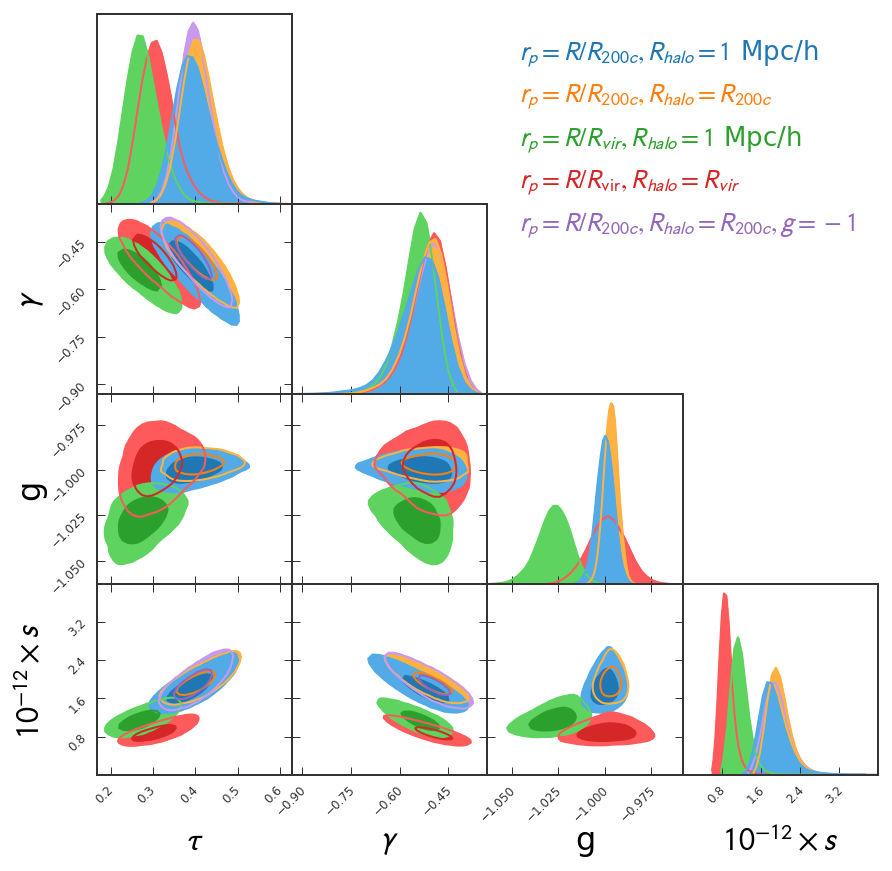

In [44]:
# List of parameter names, supports latex
# NOTE: For capital greek letters in latex mode, use \mathsf{}
names = [r'$\tau$', r'$\gamma$', 'g', r'$10^{-12} \times s$']

# Labels for the different chains
#chainLabels = list(chains_dict.keys())

# List of Gaussian curves to plot
#(to represent priors): mean, width
# Empty () or None if no prior to plot
#priors = ((2, 1),(-1, 2),(),(0, .4),None,(1,1),None,None)

# List of truth values, to mark best-fit or input values
# NOT a python array because of different lengths
# Here we choose two sets of truth values
#truths = ((4, .5, None, .1, 0, None, None, 0),
#          (None, None, .3, 1, None, None, None, None))

# Labels for the different truths
#truthLabels = ( 'the truth',
#              'also true')

paramRanges = (None,
                None,
                None,
                (0,4))

#['blues', 'oranges', 'greens', 'reds', 'purples', 'browns', 'pinks', 'grays', 'yellows', 'cyans']
colorsOrder = []

# Do the magic
GTC = pygtc.plotGTC(chains=chains,
                    paramNames=names,
                    chainLabels=chainLabels,
                    paramRanges=paramRanges,
                    figureSize='MNRAS_page',
                    customLabelFont = {'family':'DejaVu Sans', 'size':16},
                    customLegendFont = {'family':'DejaVu Sans', 'size':13},
                    plotName=plotdir+'GTC_models_M2e14_5e14_z0p00.pdf')

